## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (2)

#### Daten und Werkzeuge importieren

In [56]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
sns.set(style="whitegrid") #"whitegrid", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [58]:
Daten.shape

(401, 377)

#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [59]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

#### Untergruppen und Listen für die Analyse

In [60]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [61]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

### B-Q1 (Kontexte des Strategienerwerbs)

Antwortoptionen (Mehrfachauswahl möglich):
1. En las clases de Lengua y Literatura en el colegio o instituto
2. En las clases de inglés en el colegio o instituto
3. En otras clases de idiomas en el colegio o instituto
4. En clases de alemán anteriores en la Universidad
5. En otras asignaturas de mi carrera universitaria
6. En clases de lenguas en escuelas de idiomas o academias
7. En mi curso de alemán actual
8. En mi familia, con mis amigos/as o compañeros/as de clase
9. Por mi cuenta, sin ayuda de otras personas
10. Otros:
11. No sé cómo he aprendido estas estrategias.

Deutsche Übersetzung:
1. Im Sprach- und Literaturunterricht (muttersprachlicher Unterricht) in der Schule
2. Im Englischunterricht in der Schule
3. In anderem Sprachunterricht in der Schule
4. In früheren Deutschkursen an der Universität
5. In anderen Lehrveranstaltungen im Rahmen meines Studiums
6. In Sprachkursen in Sprachschulen
7. In meinem aktuellen Deutschkurs
8. In der Familie, im Freundeskreis oder durch Kommilitonen/innen
9. Allein, ohne Hilfe anderer Personen
10. Andere:
11. Ich weiß eigentlich nicht, wie ich diese Strategien erworben habe.

In [62]:
Kontexte = Finished[['B-Q1_1','B-Q1_2','B-Q1_3','B-Q1_4','B-Q1_5','B-Q1_6','B-Q1_7','B-Q1_8','B-Q1_9','B-Q1_10','B-Q1_11']]

In [63]:
DF_Kontexte = Kontexte.apply(pd.value_counts).fillna(0).astype(integer)

In [64]:
DF_Kontexte.iloc[1].sort_values(ascending = False)

B-Q1_7     232
B-Q1_9     220
B-Q1_2     220
B-Q1_3     176
B-Q1_6     157
B-Q1_1     139
B-Q1_5     138
B-Q1_4     119
B-Q1_8      92
B-Q1_10     23
B-Q1_11     11
Name: 1, dtype: int32

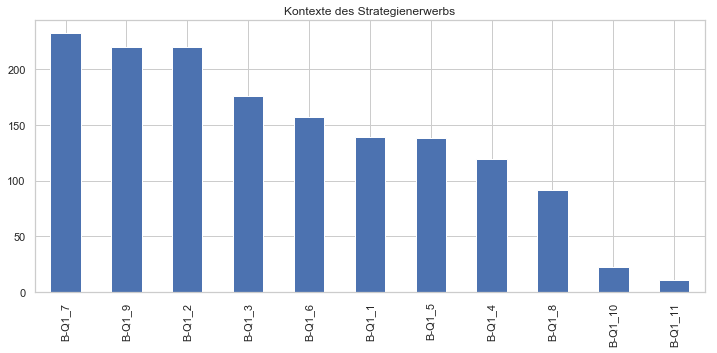

In [65]:
DF_Kontexte.iloc[1].sort_values(ascending = False).plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = False, title = "Kontexte des Strategienerwerbs");

Angaben bei "Andere" (10):

In [66]:
Finished[Finished['B-Q1_10_TEXT']!=0].shape

(23, 377)

In [67]:
Finished[Finished['B-Q1_10_TEXT']!=0]['B-Q1_10_TEXT']

13     Sentido común y uso intuitivo y automático de ...
27                                            CON MARIAN
43     leyendo sobre estrategias de aprendizaje en in...
44                            Con lecturas por Internet 
60     En otras materias que enseñaban a hacer resume...
104                               Leyendo el diccionario
141           Leyendo en otros idiomas por cuenta propia
164                               estudiar en extranjero
187    En distintas asignaturas a lo largo de todos m...
202                                   Intuición personal
206    Tengo bastante intuición con las lenguas y he ...
222                            Razonamiento comparativo 
230                        en realidad es mezcla de todo
240    En el Instituto cultural alemán (Sevilla) y en...
246    leyendo textos por mi mismo y poniendo en rela...
247    se me da bien aprender idiomas y tengo facilid...
262    convivencia con amigos bilingües (de padre nat...
293    En mi academia, pero par

### B-Q2 (Methoden des Strategienerwerbs)

Erwerbskontexte:

In [68]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

Methoden des Stragienerwerbs (kontextübergreifend in Unterrichtssituationen):

In [69]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6'],
         'U7': ['B-Q2-1_7','B-Q2-2_7','B-Q2-3_7','B-Q2-4_7','B-Q2-5_7','B-Q2-6_7','B-Q2-7_7']}

Auswahl der TN, die mindestens einmal eine bestimmte Methode angegeben haben:

In [70]:
Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [71]:
Stud_U = []
Stud_U.append(Stud_U1.shape[0])
Stud_U.append(Stud_U2.shape[0])
Stud_U.append(Stud_U3.shape[0])
Stud_U.append(Stud_U4.shape[0])
Stud_U.append(Stud_U5.shape[0])
Stud_U.append(Stud_U6.shape[0])

In [72]:
Stud_U = pd.Series(Stud_U)
Stud_U.index += 1

In [73]:
Stud_E8 = Finished[(Finished['B-Q2-8_1'] == 1) | (Finished['B-Q2-8_2'] == 1) | (Finished['B-Q2-8_3'] == 1) | (Finished['B-Q2-8_4'] == 1) | (Finished['B-Q2-8_5'] == 1)]
Stud_E9 = Finished[(Finished['B-Q2-9_1'] == 1) | (Finished['B-Q2-9_2'] == 1) | (Finished['B-Q2-9_3'] == 1) | (Finished['B-Q2-9_4'] == 1) | (Finished['B-Q2-9_5'] == 1)]

##### Methoden des Strategienerwerbs nach Erwerbskontexten

Aufgrund der Beschränkungen der Papier-Version des Fragebogens hinsichtlich der Implementierung von Filterfragen können die Angaben dieser TN großteils nicht in die Auswertung der Methoden des Strategienerwerbs nach Erwerbskontexten miteinbezogen werden, da Methoden und Unterrichtskontexte nicht immer eindeutig zugeordnet werden können. Im Fall von Erwerb im sozialen Umfeld oder autonom besteht diese Problematik nicht, die Daten können für die Analyse genutzt werden. 

##### Strategienerwerb in Unterrichtskontexten

Antwortoptionen (Mehrfachauswahl möglich):
1.	Las estrategias se presentaron (y explicaron) en clase.
2.	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* Se probaron y se compararon diferentes estrategias.
* Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* Otros:

Deutsche Übersetzung:
1. Erschließungsstrategien wurden im Unterricht vorgestellt (und erklärt).
2. Die Lehrperson hat Tipps für das selbständige Aneignen von Erschließungsstrategien gegeben, z.B. über Internetseiten, Bücher oder andere Materialien, in denen Lernstrategien erklärt werden.
3. Erschließungsstrategien wurden anhand von praktischen Beispielen, beim Ausführen bestimmter Aufgaben, z.B. Lesen eines schwierigen Textes, erklärt und geübt.
4. Verschiedene Erschließungsstrategien wurden ausprobiert und miteinander verglichen.
5. Reflexionen über Einsatz von Erschließungsstrategien wurden durchgeführt, z.B. Überlegungen, welche Strategie in einer bestimmten Situation und/oder für eine bestimmte Person geeignet ist.
6. Im Laufe des Unterrichts habe ich verschiedene Erschließungsstrategien unbewusst gelernt, z.B. beim Lesen von schwierigen Texten - ohne Erklärung oder Hinweis des Lehrers.
7. Anderes:

In [74]:
Finished[Finished['IPAddress']!='2.154.100.40'][erwerb['E1']].apply(sum).sort_values(ascending = False)

B-Q2-1_6    71
B-Q2-1_2    59
B-Q2-1_3    52
B-Q2-1_1    42
B-Q2-1_5    25
B-Q2-1_4     9
B-Q2-1_7     6
dtype: int64

In [75]:
DF_Erwerb = pd.DataFrame(np.nan, columns=list(erwerb.keys())[:7], index = [1,2,3,4,5,6,7])

In [76]:
for key in list(erwerb.keys())[:7]:
    DF_Erwerb[key] = Finished[Finished['IPAddress']!='2.154.100.40'][erwerb[key]].sum().values

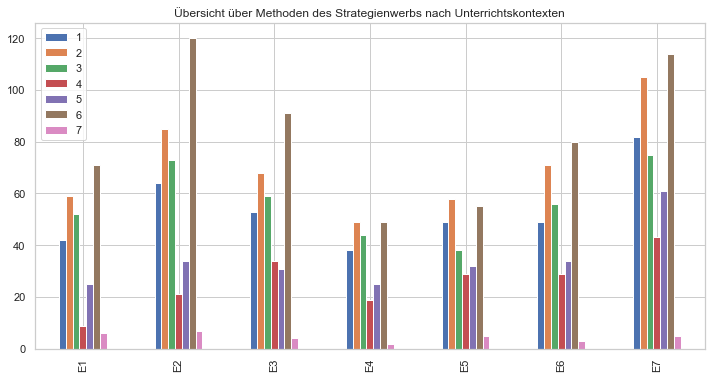

In [87]:
DF_Erwerb.T.plot(kind = 'bar', figsize = (12,6), 
                 title = 'Übersicht über Methoden des Strategienwerbs nach Unterrichtskontexten');

Angaben bei "Anderes" (7):

Im Folgenden werden die freien Texteingaben unter "Anderes", geordnet nach dem jeweiligen Erwerbskontext (Unterrichtssituationen), angezeigt. Bei denjenigen TN, die die Papierversion des Fragebogens ausgefüllt haben, können die Angaben nicht eindeutig einem bestimmten Kontext zugeordnet werden und werden daher mehrmals angezeigt.

In [120]:
Finished[Finished['IPAddress']=='2.154.100.40'].index

Int64Index([167, 168, 169, 228, 233, 234, 235, 236, 237, 238, 239, 240, 241,
            242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
            255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 267, 268,
            269, 270, 271, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
            283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295],
           dtype='int64')

1. Im Sprach- und Literaturunterricht (muttersprachlicher Unterricht) in der Schule:

In [78]:
Finished[Finished['B-Q2-1_7_TEXT'] != 0]['B-Q2-1_7_TEXT']

54                                Mi madre me las enseñó
202                 Intuición y devoción por las lenguas
267    las he aprendido por los profesores [comentari...
272                                         por mi parte
343    tambien al traducir latín y griego clásico al ...
358    Gran parte fue gracias a dos buenos profesores...
400    Creo que es una combinación que las estrategia...
Name: B-Q2-1_7_TEXT, dtype: object

In [79]:
Finished.loc[267]['B-Q2-1_7_TEXT']

'las he aprendido por los profesores [comentario en p.2]'

In [80]:
Finished.loc[343]['B-Q2-1_7_TEXT']

'tambien al traducir latín y griego clásico al español'

In [81]:
Finished.loc[358]['B-Q2-1_7_TEXT']

'Gran parte fue gracias a dos buenos profesores de lengua en primaria y otros dos en secundaria. En lenguas extranjeras como (Ingles y Frances) no hablaban tampoco mucho en ingles o frances.'

In [82]:
Finished.loc[400]['B-Q2-1_7_TEXT']

'Creo que es una combinación que las estrategias explícitas y las que se desarrollan de modo mas "automático" según el modo de gestionar la información de cada uno. '

2. Im Englischunterricht in der Schule:

In [88]:
Finished[Finished['B-Q2-2_7_TEXT'] != 0]['B-Q2-2_7_TEXT']

87                                        De los colegas
90                El profesor nos dio consejos aislados.
202                        Devoción por la propia lengua
222    Aunque los profesores no explicaran estrategia...
272                                         por mi parte
287    aunque no nos enseñan per se, sí he tenido muc...
295    Algunas estrategias (como recurrir a los prefi...
381    Cuando no sabes como afrontar los problemas si...
400    Salvo en una academia de inglés a la que he as...
Name: B-Q2-2_7_TEXT, dtype: object

In [95]:
Finished.loc[222]['B-Q2-2_7_TEXT']

'Aunque los profesores no explicaran estrategias lingüísticas, el uso de las mismas en clase, tanto por parte del profesorado como del alumnado, es inevitable.'

In [96]:
Finished.loc[287]['B-Q2-2_7_TEXT']

'aunque no nos enseñan per se, sí he tenido muchos profesores que urgen a que tratemos de entender por contexto/conocimientos previos.'

In [97]:
Finished.loc[295]['B-Q2-2_7_TEXT']

'Algunas estrategias (como recurrir a los prefijos/sufijos y significado que daban) las aprendí de profesores. Otras como mirar el contexto o traducir palabra a palabra en una compuesta me salieron inconscientes. '

In [98]:
Finished.loc[381]['B-Q2-2_7_TEXT']

'Cuando no sabes como afrontar los problemas siempre intentas hacerlo todo y repasas las cosas más de una vez y ahí empiezas a atar cabos, algunas veces.'

In [99]:
Finished.loc[400]['B-Q2-2_7_TEXT']

'Salvo en una academia de inglés a la que he asistido recientemente, creo que la reflexión sobre la estrategia es un tema pendiente en la clases de inglés de la formación básica. Más bien, se dan unas reglas para aplicar, pero no se reflexiona por ejemplo, sobre la etimología o el por qué una estructura sintáctica en un idioma es X y en otro es Y. '

3. In anderem Sprachunterricht in der Schule:

In [89]:
Finished[Finished['B-Q2-3_7_TEXT'] != 0]['B-Q2-3_7_TEXT']

90     El profesor dio consejos aislados sobre el rec...
202                             Devoción por las lenguas
273                              Mi profesor me lo dijo.
280    Los profesores nos solían explicar o describir...
381    Muchas veces haces exámenes o trabajos y no en...
Name: B-Q2-3_7_TEXT, dtype: object

In [100]:
Finished.loc[90]['B-Q2-3_7_TEXT']

'El profesor dio consejos aislados sobre el reconocimiento de palabras.'

In [101]:
Finished.loc[280]['B-Q2-3_7_TEXT']

'Los profesores nos solían explicar o describir la duda, en este caso la palabra para que supiesemos que era, en el idioma que estabamos aprendiendo. Nunca en nuestra lengua materna. Algo que considero bastante interesante y educativo.'

In [102]:
Finished.loc[381]['B-Q2-3_7_TEXT']

'Muchas veces haces exámenes o trabajos y no entiendes alguna palabra y no tienes ningún medio de reconocimiento y es cuando lo repasas más de una vez cuando atas cabos, algunas veces.'

4. In früheren Deutschkursen an der Universität:

In [90]:
Finished[Finished['B-Q2-4_7_TEXT'] != 0]['B-Q2-4_7_TEXT']

90     El profesor dio consejos aislados sobre el rec...
149    Dieron el conocimiento de la sintaxis y la mor...
273                              Mi profesor me lo dijo.
280    Los profesores nos solían explicar o describir...
295    Algunas estrategias (como recurrir a los prefi...
Name: B-Q2-4_7_TEXT, dtype: object

In [103]:
Finished.loc[90]['B-Q2-4_7_TEXT']

'El profesor dio consejos aislados sobre el reconocimiento de palabras.'

In [104]:
Finished.loc[149]['B-Q2-4_7_TEXT']

'Dieron el conocimiento de la sintaxis y la morfología de las palabras de modo que ahora puedo entender algunas cosas mejor. '

In [105]:
Finished.loc[280]['B-Q2-4_7_TEXT']

'Los profesores nos solían explicar o describir la duda, en este caso la palabra para que supiesemos que era, en el idioma que estabamos aprendiendo. Nunca en nuestra lengua materna. Algo que considero bastante interesante y educativo.'

In [106]:
Finished.loc[295]['B-Q2-4_7_TEXT']

'Algunas estrategias (como recurrir a los prefijos/sufijos y significado que daban) las aprendí de profesores. Otras como mirar el contexto o traducir palabra a palabra en una compuesta me salieron inconscientes. '

5. In anderen Lehrveranstaltungen im Rahmen meines Studiums:

In [91]:
Finished[Finished['B-Q2-5_7_TEXT'] != 0]['B-Q2-5_7_TEXT']

121                                           Tutoriales
208                              En clase de Lingüística
266    en clase de TIC unos compañeros hicieron una e...
295    Algunas estrategias (como recurrir a los prefi...
392    Nos mostraron páginas de traducción no solo de...
400    En mi carrera, (filosofía), una de las princip...
Name: B-Q2-5_7_TEXT, dtype: object

In [107]:
Finished.loc[266]['B-Q2-5_7_TEXT']

'en clase de TIC unos compañeros hicieron una exposición sobre los distintos recursos que teníamos online para familiarnos con el idioma y buscar dudas.'

In [108]:
Finished.loc[295]['B-Q2-5_7_TEXT']

'Algunas estrategias (como recurrir a los prefijos/sufijos y significado que daban) las aprendí de profesores. Otras como mirar el contexto o traducir palabra a palabra en una compuesta me salieron inconscientes. '

In [109]:
Finished.loc[392]['B-Q2-5_7_TEXT']

'Nos mostraron páginas de traducción no solo de la palabra sino de su contexto '

In [110]:
Finished.loc[400]['B-Q2-5_7_TEXT']

'En mi carrera, (filosofía), una de las principales competencias a adquirir es el análisis de textos muy complejos y de diferentes épocas. De modo que mucha veces, al estudiar idiomas y aún sabiendo que no puedo suplir el estudio de vocabulario o gramática en un sentido "fuerte" del idioma, utilizo muchas de estas estrategias para la comprensión. A veces, dificulta el proceso, porque hago demasiada "abstracción" e intento decir cosas más complicadas que el nivel del idioma en cuestión del que dispongo. Pero otras veces, por ejemplo en los audios o lecturas, me ayuda mucho por el contexto o cuestiones de cultura general a "intuir" las respuestas. '

6. In Sprachkursen in Sprachschulen:

In [92]:
Finished[Finished['B-Q2-6_7_TEXT'] != 0]['B-Q2-6_7_TEXT']

90     El profesor dio conocimientos aislados sobre e...
117    La profesora pedía que durante la primera lect...
280    Los profesores nos solían explicar o describir...
400    Recientemente, asistí a una academia de inglés...
Name: B-Q2-6_7_TEXT, dtype: object

In [111]:
Finished.loc[90]['B-Q2-6_7_TEXT']

'El profesor dio conocimientos aislados sobre el reconocimiento de palabras.'

In [112]:
Finished.loc[117]['B-Q2-6_7_TEXT']

'La profesora pedía que durante la primera lectura del texto,  subrayásemos todas aquellas palabras o colocaciones que no entendiésemos, y posteriormente,  tras una segundalectura,  con la idea global que yo tenía del texto, conseguía descifrar automáticamente muchas de esas palabras. '

In [113]:
Finished.loc[280]['B-Q2-6_7_TEXT']

'Los profesores nos solían explicar o describir la duda, en este caso la palabra para que supiesemos que era, en el idioma que estabamos aprendiendo. Nunca en nuestra lengua materna. Algo que considero bastante interesante y educativo.'

In [114]:
Finished.loc[400]['B-Q2-6_7_TEXT']

'Recientemente, asistí a una academia de inglés para obtener el B1. Al estar estrictamente centrada en el modelo de examen Cambridge, teníamos un programa y unos contenidos muy definidos, de modo que podíamos desarrollar diferentes estrategias para cada caso concreto, según se adaptasen mejor a nuestras necesidades. '

7. In meinem aktuellen Deutschkurs:

In [93]:
Finished[Finished['B-Q2-7_7_TEXT'] != 0]['B-Q2-7_7_TEXT']

12     Se explicó cómo aprender el plural al mismo ti...
188                                    Con esta encuesta
243    Nunca ha sido en una clase en concreto, solo s...
287    aunque no nos enseñan per se, sí he tenido muc...
338    Buscando en internet cuando desconocía la pala...
400    En mi curso actual, nos basamos en un "método"...
Name: B-Q2-7_7_TEXT, dtype: object

In [115]:
Finished.loc[12]['B-Q2-7_7_TEXT']

'Se explicó cómo aprender el plural al mismo tiempo que se aprende la palabra'

In [116]:
Finished.loc[243]['B-Q2-7_7_TEXT']

'Nunca ha sido en una clase en concreto, solo surgía al preguntar un alumno, entonces para intentar que fuesemos más autosuficientes nos lo dijeran.'

In [117]:
Finished.loc[287]['B-Q2-7_7_TEXT']

'aunque no nos enseñan per se, sí he tenido muchos profesores que urgen a que tratemos de entender por contexto/conocimientos previos.'

In [118]:
Finished.loc[338]['B-Q2-7_7_TEXT']

'Buscando en internet cuando desconocía la palabra, o preguntándole el significado a la profesora'

In [119]:
Finished.loc[400]['B-Q2-7_7_TEXT']

'En mi curso actual, nos basamos en un "método" que creo que es muy novedoso porque se prioriza la cuestión de la escucha y la práctica, con el objetivo de que las estructuras y estrategias se vayan adquiriendo después de la práctica o con ella, y no antes. Lo veo positivo para desenvolverme con mayor facilidad en una conversación, pero en mi opinión, echo de menos alguna clase mas "teórica" que busque pensar las estrategias. '

Zusammenfassung der Angaben zu Methoden in Unterrichtskontexten:

In [83]:
Erwerb_U = []
for lst in erwerb1:
        Erwerb_U.append(Finished[Finished['IPAddress']!='2.154.100.40'][erwerb1[lst]].apply(pd.value_counts).astype(integer).iloc[1].sum())

Erwerb_U = pd.Series(Erwerb_U)
Erwerb_U.index += 1

In [84]:
Erwerb_U.sort_values(ascending = False)

6    580
2    495
3    397
1    377
5    242
4    184
7     32
dtype: int64

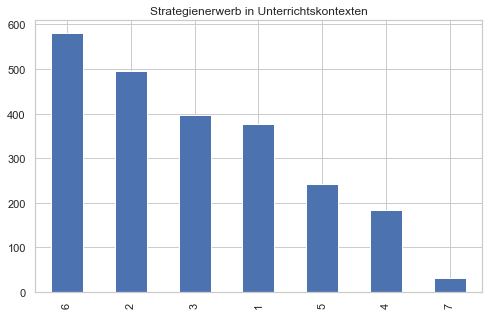

In [85]:
Erwerb_U.sort_values(ascending = False).plot(kind='bar', 
                                        figsize = (8,5), width = 0.5, 
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

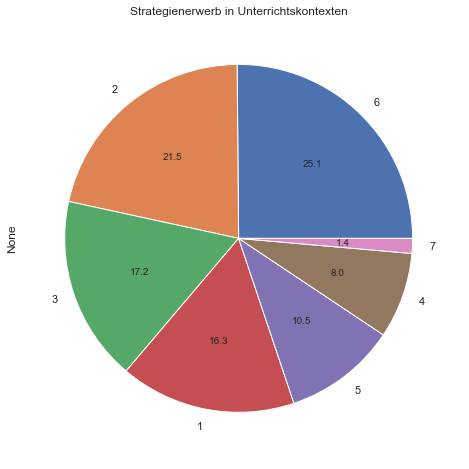

In [86]:
Erwerb_U.sort_values(ascending = False).plot(kind='pie', 
                                        figsize = (8,8), autopct='%.1f',
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

In [43]:
Stud_U.sort_values(ascending=False)

6    263
2    247
1    201
3    198
5    148
4    114
dtype: int64

##### Strategienerwerb im sozialen Umfeld

Antwortoptionen (Mehrfachauswahl möglich):
1.	He conocido estas estrategias en mi familia.
* He conocido estas estrategias hablando con amigos/as y conocidos/as.
* He conocido estas estrategias hablando con compañeros/as de clase.
* He conocido estas estrategias imitando hábitos de trabajo de compañeros/as de clase aventajados/as.
* Otros:

Deutsche Übersetzung:
1. Ich habe Erschließungsstrategien in meiner Familie kennen gelernt.
2.  Ich habe Erschließungsstrategien durch den Austausch mit Freunden und Bekannten kennen gelernt.
3. Ich habe Erschließungsstrategien durch den Austausch mit Kommilitonen/innen kennen gelernt.
4. Ich habe Erschließungsstrategien durch Beobachtung von erfolgreichen Kommilitonen/innen kennen gelernt.
5. Anderes:

In [29]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False)

B-Q2-8_3    66
B-Q2-8_2    40
B-Q2-8_4    39
B-Q2-8_1    31
B-Q2-8_5     6
dtype: int64

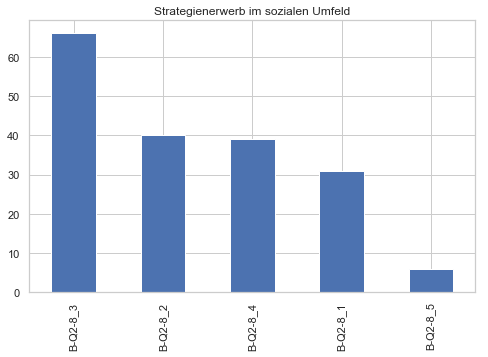

In [30]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Strategienerwerb im sozialen Umfeld");

Angaben bei "Anderes" (5):

In [31]:
Finished[Finished['B-Q2-8_5_TEXT'] != 0]['B-Q2-8_5_TEXT']

11     Actualmente mi primo vive en Alemánia y mi her...
24     Mi tía ha sido mi profesora de idiomas desde q...
128    He utilizado algunas estrategias de manera aut...
272                          creo eran positivas para mi
392    compañeros de clase extranjeros y la necesidad...
Name: B-Q2-8_5_TEXT, dtype: object

In [121]:
Finished['B-Q2-8_5_TEXT'][11]

'Actualmente mi primo vive en Alemánia y mi hermana vivi? all? también. Dado a esto, siempre he estado muy interesada en el alemán y he aprendido a base de esto. '

In [122]:
Finished['B-Q2-8_5_TEXT'][24]

'Mi tía ha sido mi profesora de idiomas desde que nací'

In [123]:
Finished['B-Q2-8_5_TEXT'][128]

'He utilizado algunas estrategias de manera autónoma e intuitiva utilizando el principio de "divide y vencerás"'

In [32]:
Finished['B-Q2-8_5_TEXT'][392]

'compañeros de clase extranjeros y la necesidad de hablar '

##### Autonomer Strategienerwerb

Antwortoptionen (Mehrfachauswahl möglich):
1.	He desarrollado estas estrategias por mi cuenta durante el aprendizaje y el uso de idiomas, p. ej. leyendo textos difíciles.
* He probado diferentes cosas y me he dado cuenta de qué funciona mejor para mi.
* He aprendido estas estrategias con ayuda de páginas web o blogs.
* He aprendido estas estrategias con ayuda de libros.
* He aprendido estas estrategias con ayuda de otros materiales. (Opcional: Cuáles?)

Deutsche Übersetzung:
1. Ich habe Erschließungsstrategien beim Lernen und Anwenden von Sprachen, z.B. beim Lesen schwieriger Texte, selbständig entwickelt.
2. Ich habe verschiedene Dinge ausprobiert und herausgefunden, was für mich am besten funktioniert.
3. Ich habe Erschließungsstrategien mit Hilfe von Internetseiten oder –blogs gelernt.
4. Ich habe Erschließungsstrategien mit Hilfe von Büchern gelernt.
5. Ich habe Erschließungsstrategien mit Hilfe anderer Materialien gelernt. (Optional: Welche?)

In [33]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False)

B-Q2-9_1    177
B-Q2-9_2    150
B-Q2-9_3     53
B-Q2-9_4     49
B-Q2-9_5     17
dtype: int64

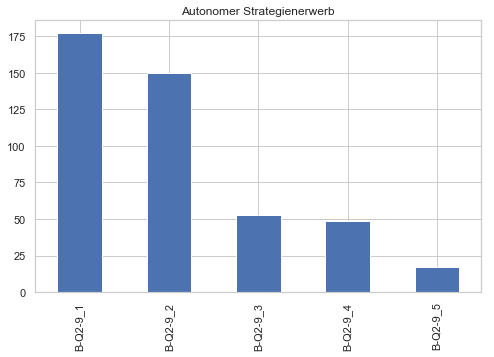

In [34]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Autonomer Strategienerwerb");

Angaben bei "Welche?" (Option der freien Texteingabe bei Item 5):

In [35]:
Finished[Finished['B-Q2-9_5_TEXT'] != 0]['B-Q2-9_5_TEXT']

44                                        YouTube, blogs
45     He aprendido estas estrategias pensando y util...
53     '-Libros, diccionarios, películas,audios,músic...
54                               Gracias a esta encuesta
61     Mi inteligencia, sentido común e instinto ling...
84                                         Series, Radio
86                                    youtube, instagram
87                     Los compañeros me han dado pistas
92                                          diccionarios
259                              Grámaticas, Duden, etc.
284    Videojuegos, música, en ambos leo lo que estoy...
372           Aplicaciones móviles para aprender idiomas
373                                Ver vídeos en YouTube
377                         Comparando con otros idiomas
Name: B-Q2-9_5_TEXT, dtype: object

In [124]:
Finished['B-Q2-9_5_TEXT'][45]

'He aprendido estas estrategias pensando y utilizando la l?gica'

In [125]:
Finished['B-Q2-9_5_TEXT'][53]

"'-Libros, diccionarios, películas,audios,música, comunicación"

In [126]:
Finished['B-Q2-9_5_TEXT'][61]

'Mi inteligencia, sentido común e instinto lingüístico '

In [127]:
Finished['B-Q2-9_5_TEXT'][284]

'Videojuegos, música, en ambos leo lo que estoy escuchando, entendiendo así el contexto'

### B-Q3 + B-Q4 (Strategienwerb im Rahmen der Befragung)

Frage B-Q3 und Antwortoptionen:

¿Ha aprendido alguna estrategia nueva para comprender palabras desconocidas en alemán gracias a esta encuesta? 
1.	Sí.
2.	No.
3.	No estoy seguro/a.


Frage B-Q4 und Antwortoptionen:

¿Aplicaría alguna de estas estrategias nuevas?
1.	Sí.
2.	No.
3.	No estoy seguro/a.


Deutsche Übersetzung:

B-Q3:

Haben Sie durch diese Befragung neue Erschließungsstrategien im Deutschen kennen gelernt?
1. Ja.
2. Nein.
3. Ich bin nicht sicher.


B-Q4:

Würden Sie eine dieser neuen Strategien anwenden?
1. Ja.
2. Nein.
3. Ich bin nicht sicher.

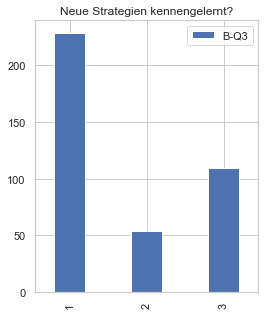

In [44]:
Finished['B-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien kennengelernt?");

(1) Ja
(2) Nein
(3) Vielleicht

In [45]:
Finished['B-Q3'].value_counts()

1    228
3    109
2     54
Name: B-Q3, dtype: int64

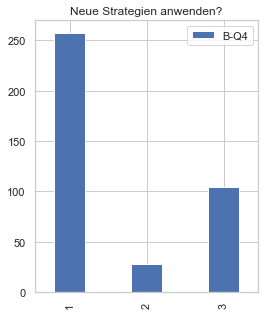

In [46]:
Finished['B-Q4'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien anwenden?");

In [47]:
Finished['B-Q4'].value_counts()

1    257
3    104
2     28
0      2
Name: B-Q4, dtype: int64

### C-Q1 (Einstellung zu Erschließungsstrategien)

Items:

1. Pienso que en alemán utilizo estas estrategias con éxito. 
2. Estas estrategias son un tema importante en mis clases de alemán.
3. Utilizo estas estrategias a menudo fuera del aula, p. ej. cuando leo textos en alemán en mi tiempo libre.
4. Estas estrategias son útiles para ampliar el vocabulario en alemán.
5. Estas estrategias son útiles para entender mejor textos en alemán.
6. Estas estrategias deberían explicarse y practicarse en las clases de alemán.
7. No hace falta aprender estas estrategias, ya que las usamos en cualquier caso de forma inconsciente. 


Deutsche Übersetzung:
1. Ich denke, dass ich Erschließungsstrategien im Deutschen erfolgreich einsetze.
2. Strategien zur Erschließung unbekannter Wörter sind ein wichtiges Thema in meinem Deutschunterricht.
3. Ich nutze Erschließungsstrategien häufig außerhalb des Unterrichts, z.B. beim Lesen deutscher Texte in meiner Freizeit.
4. Erschließungsstrategien sind nützlich, um den Wortschatz zu erweitern.
5. Erschließungsstrategien sind nützlich, um deutsche Texte besser verstehen zu können.
6. Erschließungsstrategien sollten im Deutschunterricht erklärt und geübt werden.
7. Es ist nicht notwendig, Erschließungsstrategien zu lernen, weil wir sie ohnehin unbewusst anwenden.

In [48]:
df_describe(Finished,Liste_C_Q1)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
C-Q1_1,391.0,3.529412,0.884933,1.0,3.0,4.0,4.0,5.0,4,4.0,0.378700,-0.580479
C-Q1_2,391.0,3.647059,1.108584,1.0,3.0,4.0,5.0,5.0,4,4.0,-0.421035,-0.528398
C-Q1_3,391.0,3.831202,1.077580,1.0,3.0,4.0,5.0,5.0,4,4.0,0.415203,-0.945001
C-Q1_4,391.0,4.401535,0.828900,1.0,4.0,5.0,5.0,5.0,5,5.0,2.761439,-1.597907
C-Q1_5,391.0,4.432225,0.757787,1.0,4.0,5.0,5.0,5.0,5,5.0,3.611769,-1.616713
C-Q1_6,391.0,4.278772,0.845219,1.0,4.0,4.0,5.0,5.0,5,4.0,1.601275,-1.231322
C-Q1_7,391.0,2.554987,1.170763,1.0,2.0,2.0,3.0,5.0,2,2.0,-0.572726,0.449894


In [54]:
#df_describe(Finished,Liste_C_Q1).to_excel('D:\Daten\DISS\Daten\Deskriptiv_C1.xlsx')

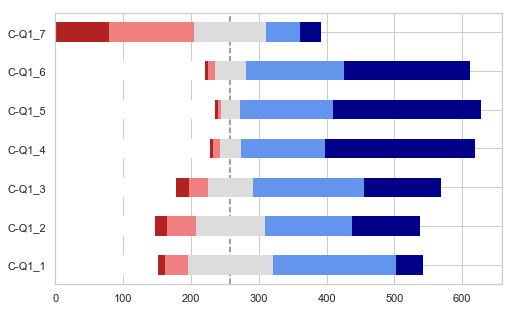

In [49]:
graf_likert(Finished,Liste_C_Q1,5)

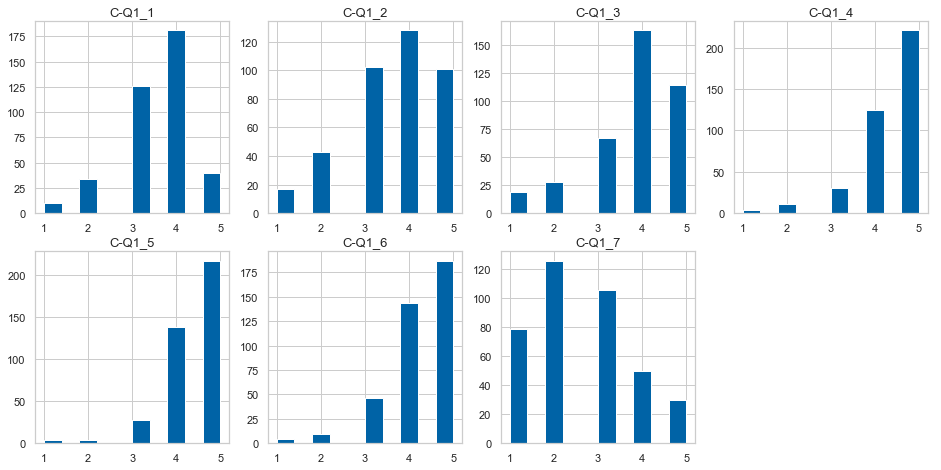

In [50]:
graf_hist(Finished,Liste_C_Q1,16,12,3,4)

##### Korrelation in C-Q1

In [52]:
df_spearman(Finished,Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,1,0.117673,0.4278,0.276088,0.320062,0.0878351,0.0569583
C-Q1_2,0.117673,1,0.0389052,0.210121,0.266888,0.244285,-0.130852
C-Q1_3,0.4278,0.0389052,1,0.194015,0.330158,0.0444314,0.0407285
C-Q1_4,0.276088,0.210121,0.194015,1,0.531258,0.259728,-0.253979
C-Q1_5,0.320062,0.266888,0.330158,0.531258,1,0.284967,-0.145297
C-Q1_6,0.0878351,0.244285,0.0444314,0.259728,0.284967,1,-0.261567
C-Q1_7,0.0569583,-0.130852,0.0407285,-0.253979,-0.145297,-0.261567,1


In [53]:
df_spearman_pv(Finished,Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,0,0.0199395,7.87919e-19,2.85583e-08,9.18497e-11,0.0828082,0.261189
C-Q1_2,0.0199395,0,0.443006,2.80906e-05,8.41634e-08,1.01237e-06,0.00958919
C-Q1_3,7.87919e-19,0.443006,0,0.00011299,2.1384e-11,0.380925,0.421912
C-Q1_4,2.85583e-08,2.80906e-05,0.00011299,0,7.36495e-30,1.89857e-07,3.58566e-07
C-Q1_5,9.18497e-11,8.41634e-08,2.1384e-11,7.36495e-30,0,9.68321e-09,0.00398748
C-Q1_6,0.0828082,1.01237e-06,0.380925,1.89857e-07,9.68321e-09,0,1.54404e-07
C-Q1_7,0.261189,0.00958919,0.421912,3.58566e-07,0.00398748,1.54404e-07,0
